In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1 

In [17]:
def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))

t = np.linspace(0, 20, num=100)
S = step_function(t)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [73]:
# Parameters
k_S = 1
k_IR = 1
k_RR = 10
k_RI = 1 
gamma_R = 1
gamma_I = 1 

K = 4
m = 2

# Range of Phase space
max_R = 15
min_R = -1
R_width = 0.01
R = np.arange(min_R, max_R + R_width, R_width)
max_I = 15
min_I = 0
I_width = 0.01
I = np.arange(min_I, max_I + I_width, I_width)
R, I = np.meshgrid(R, I)



def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))

t = 0 #np.linspace(0, 20, num=100)
S = step_function(t)

dR = k_S * S - gamma_R * R + k_RR * ( R**m / (K**m + R**m) ) - k_RI * I
dI = k_IR * R - gamma_I * I 

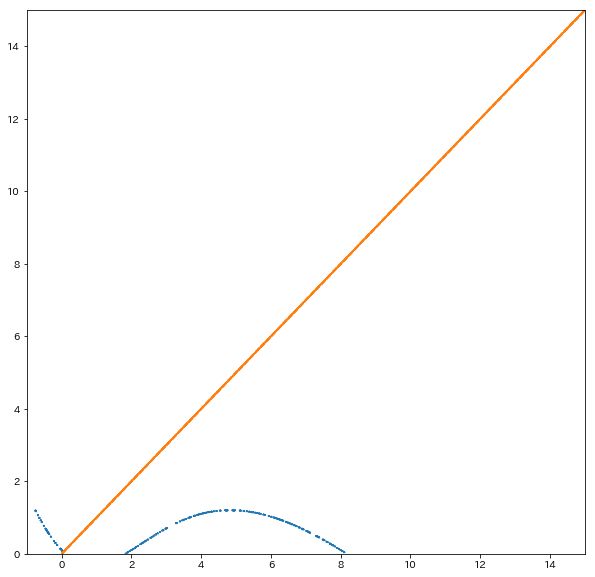

In [74]:
plt.figure(figsize=(10,10))
plt.title('')
#plt.streamplot(R, I, dR, dI)
plt.contour(R, I, np.isclose(dR, 0.0, atol=1e-3), linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(R, I, np.isclose(dI, 0.0, atol=1e-3), linestyles=["dashed"], colors=[sns.color_palette()[1]])
#plt.plot(trajectory[:,0], trajectory[:,1], color="red")

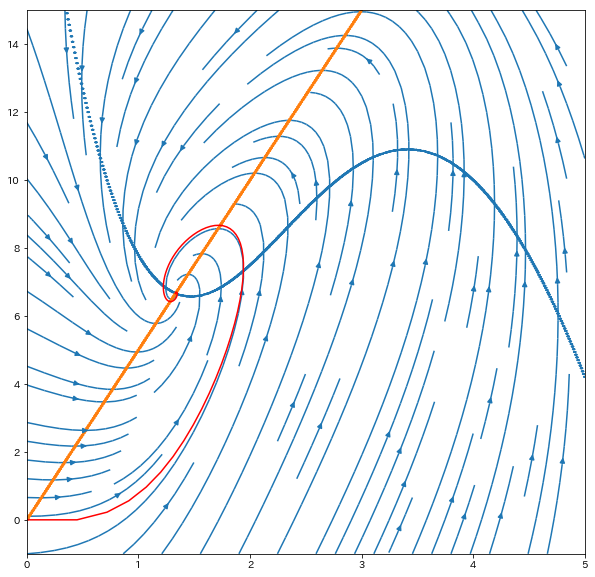

In [122]:
# Parameters
k_S = 45
k_IR = 5
k_RR = 35
k_RI = 0.2
gamma_R = 5
gamma_I = 1 

K = 4
m = 2

# Range of Phase space
max_R = 5
min_R = -0
R_width = 0.01
R = np.arange(min_R, max_R + R_width, R_width)
max_I = 15
min_I = -1
I_width = 0.01
I = np.arange(min_I, max_I + I_width, I_width)
R, I = np.meshgrid(R, I)



def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))

#t = 0 #np.linspace(0, 20, num=100)
S = 0.1 #step_function(t)

dR = k_S * S - gamma_R * R + k_RR * ( R**m / (K**m + R**m) ) - k_RI * I
dI = k_IR * R - gamma_I * I 

def calculate_differential(R, I):
    dR = k_S * S - gamma_R * R + k_RR * ( R**m / (K**m + R**m) ) - k_RI * I
    dI = k_IR * R - gamma_I * I 
    return dR, dI

def calculate_trajectory(x_0, y_0, differential, delta = 0.1, steps=1000):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0 
    for _ in range(1000):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1
    return ｔrajectory



R_0, I_0 = 0, 0
trajectory = calculate_trajectory(R_0, I_0, 
                                  differential=calculate_differential, 
                                  delta = 0.1, steps=1000)


plt.figure(figsize=(10,10))
plt.title('')
plt.streamplot(R, I, dR, dI)
plt.contour(R, I, np.isclose(dR, 0.0, atol=1e-3), linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(R, I, np.isclose(dI, 0.0, atol=1e-3), linestyles=["dashed"], colors=[sns.color_palette()[1]])
plt.plot(trajectory[:,0], trajectory[:,1], color="red")

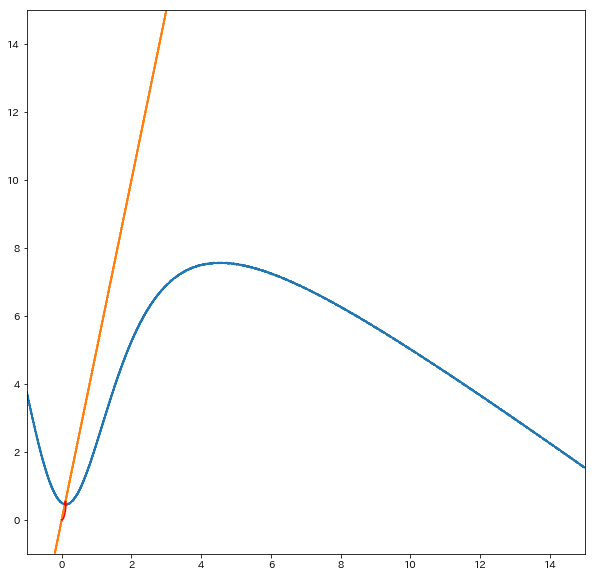

In [166]:
# Parameters
k_S = 0.1
k_IR = 5
k_RR = 2.5
k_RI = 0.2
gamma_R = 0.15
gamma_I = 1 

K = 2
m = 2

# Range of Phase space
max_R = 15
min_R = -1
R_width = 0.01
R = np.arange(min_R, max_R + R_width, R_width)
max_I = 15
min_I = -1
I_width = 0.01
I = np.arange(min_I, max_I + I_width, I_width)
R, I = np.meshgrid(R, I)



def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))

#t = 0 #np.linspace(0, 20, num=100)
S = 1 #step_function(t)

dR = k_S * S - gamma_R * R + k_RR * ( R**m / (K**m + R**m) ) - k_RI * I
dI = k_IR * R - gamma_I * I 

def calculate_differential(R, I):
    dR = k_S * S - gamma_R * R + k_RR * ( R**m / (K**m + R**m) ) - k_RI * I
    dI = k_IR * R - gamma_I * I 
    return dR, dI

def calculate_trajectory(x_0, y_0, differential, delta = 0.1, steps=1000):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0 
    for _ in range(1000):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1
    return ｔrajectory



R_0, I_0 = 0, 0
trajectory = calculate_trajectory(R_0, I_0, 
                                  differential=calculate_differential, 
                                  delta = 0.1, steps=1000)


plt.figure(figsize=(10,10))
plt.title('')
#plt.streamplot(R, I, dR, dI)
plt.contour(R, I, np.isclose(dR, 0.0, atol=1e-3), linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(R, I, np.isclose(dI, 0.0, atol=1e-3), linestyles=["dashed"], colors=[sns.color_palette()[1]])
plt.plot(trajectory[:,0], trajectory[:,1], color="red")

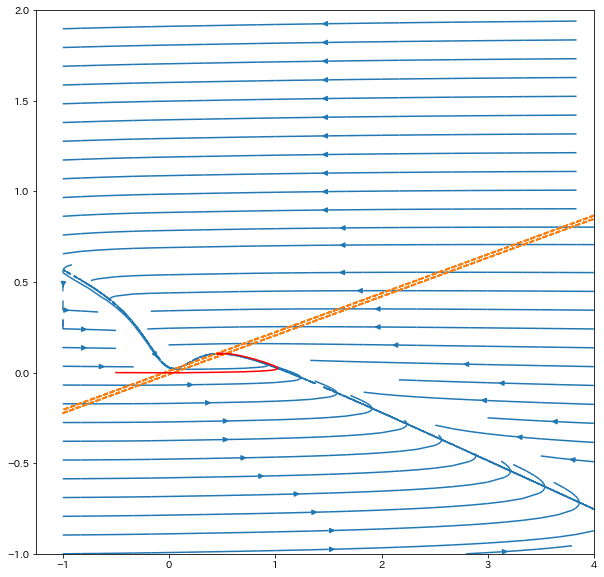

In [176]:
# Parameters
k_S = 0.1
k_IR = 0.0236
k_RR = 3.16
k_RI = 10.65
gamma_R = 2.87
gamma_I = 0.11 

K = 0.32
m = 2

# Range of Phase space
max_R = 4
min_R = -1
R_width = 0.001
R = np.arange(min_R, max_R + R_width, R_width)
max_I = 2
min_I = -1
I_width = 0.001
I = np.arange(min_I, max_I + I_width, I_width)
R, I = np.meshgrid(R, I)



def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))

#t = 0 #np.linspace(0, 20, num=100)
S = 3 #step_function(t)

dR = k_S * S - gamma_R * R + k_RR * ( R**m / (K**m + R**m) ) - k_RI * I
dI = k_IR * R - gamma_I * I 

def calculate_differential(R, I):
    dR = k_S * S - gamma_R * R + k_RR * ( R**m / (K**m + R**m) ) - k_RI * I
    dI = k_IR * R - gamma_I * I 
    return dR, dI

def calculate_trajectory(x_0, y_0, differential, delta = 0.1, steps=1000):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0 
    for _ in range(1000):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1
    return ｔrajectory



R_0, I_0 = -0.5, 0
trajectory = calculate_trajectory(R_0, I_0, 
                                  differential=calculate_differential, 
                                  delta = 0.1, steps=1000)


plt.figure(figsize=(10,10))
plt.title('')
plt.streamplot(R, I, dR, dI)
plt.contour(R, I, np.isclose(dR, 0.0, atol=1e-3), linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(R, I, np.isclose(dI, 0.0, atol=1e-3), linestyles=["dashed"], colors=[sns.color_palette()[1]])
plt.plot(trajectory[:,0], trajectory[:,1], color="red")

In [177]:
trajectory

array([[-0.5       ,  0.        ],
       [-0.10232293, -0.00118   ],
       [-0.01238693, -0.0014085 ],
       ...,
       [ 0.48560887,  0.10418479],
       [ 0.48560855,  0.10418479],
       [ 0.48560822,  0.1041848 ]])